In [17]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../datasets/diabetes_retrain.csv')

In [19]:
x= df[['HighBP','HighChol','BMI','Stroke','HeartDiseaseorAttack','GenHlth','Age']].values
x[:5]

array([[ 1,  0, 26,  0,  0,  3,  4],
       [ 1,  1, 26,  1,  0,  3, 12],
       [ 0,  0, 26,  0,  0,  1, 13],
       [ 1,  1, 28,  0,  0,  3, 11],
       [ 0,  0, 29,  0,  0,  2,  8]], dtype=int64)

In [20]:
y = df['Diabetes_binary']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
model= DecisionTreeClassifier(criterion="entropy",max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [24]:
pre_x= model.predict(x_test)

In [25]:
print("Accuracy " ,metrics.accuracy_score(y_test,pre_x))

Accuracy  0.7390369490182764


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test,pre_x))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      8830
           1       0.72      0.78      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



In [28]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6879 1964]
 [2648 6182]]


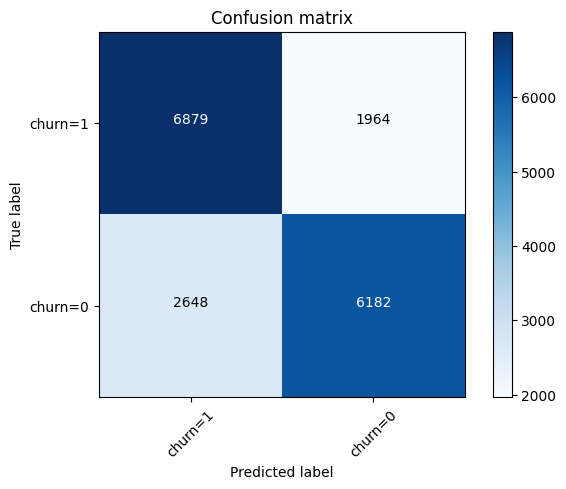

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pre_x, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [30]:
import joblib
joblib.dump(model, '../SavedModels/diabetes_model.joblib')

['../SavedModels/diabetes_model.joblib']